In [1]:
# Name: Seyyid Osman Sevgili        
# ID: 504221565

# Hw I - Fully Connected Neural Networks (100 Points)

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use diamonds dataset for classification; (ii) for actual training and testing of your implementation in this assignment.

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under DL/layers.py, which includes functions such as layer.NNLayer.* ...**



In [2]:
import numpy as np
from DL import bases, layers, activations, losses, classifiers, optimizers
from DL.checker.checks import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

**You should read:** https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b

### To auto-reload your modules from the *.py files, re run the following cell

In [3]:
%reload_ext autoreload
%autoreload 2

## 1 Layers, Activations and Optimizers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer 

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under `DL/layers.py` and find `AffineLAyer` class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [4]:
num_inputs = 10
input_shape = (4, 7, 2) 
output_dim = 3

input_size = num_inputs * np.prod(input_shape)  # 560
weight_size = output_dim * np.prod(input_shape) # 168
affineLayer = layers.AffineLayer(input_size, weight_size)  

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)  # (10, 4, 7, 2)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)  # (560, 3)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)  # (3,)

out = affineLayer.forward(x)
relError = rel_error(out, "affine_forward")

print('Testing forward method of affine layer:')
print(f'difference: {relError}')
assert 1e-6 > relError

Testing forward method of affine layer:
difference: 8.825372662436368e-08


#### Backward pass : 
Go under `DL/layers.py` and find `AffineLayer` class. Implement the backward pass for Affine layer.

In [5]:
np.random.seed(250)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)  # 840
weight_size = output_dim * np.prod(input_shape)  # 960
affineLayer = layers.AffineLayer(input_size, weight_size)  

x = np.random.randn(13, 2, 3) 
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(13, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print(f'dx error: {rel_error(dx_num, dx)}')
print(f'dw error: {rel_error(dw_num, dw)}')
print(f'db error: {rel_error(db_num, db)}')

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error: 1.2583719079635203e-09
dw error: 1.5263035322254397e-09
db error: 5.183871742878614e-10


### b. Activation Layers 

Go under `DL/activations.py` and find `ExponentialLinearUnit` class. Implement the forward pass for ExponentialLinearUnit:

ELU(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha (e^x - 1) & \text{if } x \leq 0
\end{cases}


#### Forward pass

In [6]:
exponentialLinearUnit = activations.ExponentialLinearUnit(1.0)
x = 2*(np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1))
out = exponentialLinearUnit.forward(x)
import numpy as np

# Change print format settings
np.set_printoptions(suppress=True, precision=3)
print(np.array(out))

# Compare your output with ours. 
relError = rel_error(out, "ExponentialLinearUnit_forward")
print('Testing forward method of ExponentialLinearUnit layer:')
print(f'Error: {relError}')
assert 1e-6 > relError

[[   0.       2.       6.       8.   ]
 [  -0.865    4.       8.    3546.   ]
 [  -1.       2.6      0.8     -0.181]]
Testing forward method of ExponentialLinearUnit layer:
Error: 2.15099408081792e-10


#### Backward pass

In [7]:
exponentialLinearUnit = activations.ExponentialLinearUnit(1.0)
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(exponentialLinearUnit.forward, x, dout)

exponentialLinearUnit.forward(x)
dx = exponentialLinearUnit.backward(dout)


# The error should be around 2e-11
print('Testing backward method of exponentialLinearUnit layer:')
print(f'dx error: {rel_error(dx_num, dx)}')

Testing backward method of exponentialLinearUnit layer:
dx error: 2.4835501055568096e-11


### c. Softmax classifier  

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the final layer of the network, instead of the standard activation, we utilize softmax function to turn the likelihood of each class into class probabilities. Then, we utilize the cross-entropy loss as the data loss. Below, you implement and return only the data loss component in your overall loss. 

***Implement your loss computation in the function `loss` of the `DL/losses.py`***

You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [8]:
np.random.seed(1773)
num_classes, num_inputs = 8, 60
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)
softmax = classifiers.Softmax()

def softmax_loss(x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    loss = losses.loss(probs, y) 
    return loss,dx


loss, dx = softmax_loss(x,y)
print(loss, dx.shape)
dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.0
relError = rel_error(dx_num, dx)
print('Testing softmax_loss:')
print(f'loss: {loss}')
print(f'dx error: {relError}')
assert 3 > loss
assert 1e-6 > relError

2.079497685612568 (60, 8)
Testing softmax_loss:
loss: 2.079497685612568
dx error: 6.5653583482857845e-09


### d. Implement RmsProp optimizer 
Implement RmsProp Strategy in 'Rmsprop' classes. Test their correctness using the cell below. 
Implement `RmsProp` class in `DL/optimizers.py`.

In [13]:
np.random.seed(1773)
toyModel = bases.Model()
model_layers = [layers.AffineLayer(10,2, seed=1773), layers.AffineLayer(2,3, seed=1773), classifiers.Softmax()]
toyModel(model_layers)
optimizer = optimizers.RMSprop(model=toyModel, lr=1, beta=0.9, epsilon=1e-8)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()

student_out = []
for i in range(2):
    student_out.append(toyModel[i].W)
    student_out.append(toyModel[i].b)
    
for i in range(4):
    layer_name = ["weights", "biases"][i%2]
    relError = rel_error(student_out[i], f"RMSprop_{layer_name}_{i//2}")
    print(f'Testing {layer_name} of {i//2}th layer')
    assert 1e-6 > relError

Testing weights of 0th layer
Testing biases of 0th layer
Testing weights of 1th layer
Testing biases of 1th layer


## 2. Build and test your own model! (85 points)

Below is an example which is implemented using previously defined API. In this example, you will use a subset of diamonds dataset (https://github.com/mwaskom/seaborn-data/blob/master/diamonds.csv). Each instance has 4 features in this subset. You will select a pair of two features and do your experiments on it. 

In [14]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [15]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

# create a subset
diamonds_filtered = (diamonds[diamonds['color'].isin(['E', 'J', 'H'])]).iloc[:500]
diamonds_filtered = diamonds_filtered[['carat','depth', 'table', 'color', 'price']]

# Display the first few rows of the DataFrame
print(diamonds_filtered.head())

   carat  depth  table color  price
0   0.23   61.5   55.0     E    326
1   0.21   59.8   61.0     E    326
2   0.23   56.9   65.0     E    327
4   0.31   63.3   58.0     J    335
5   0.24   62.8   57.0     J    336


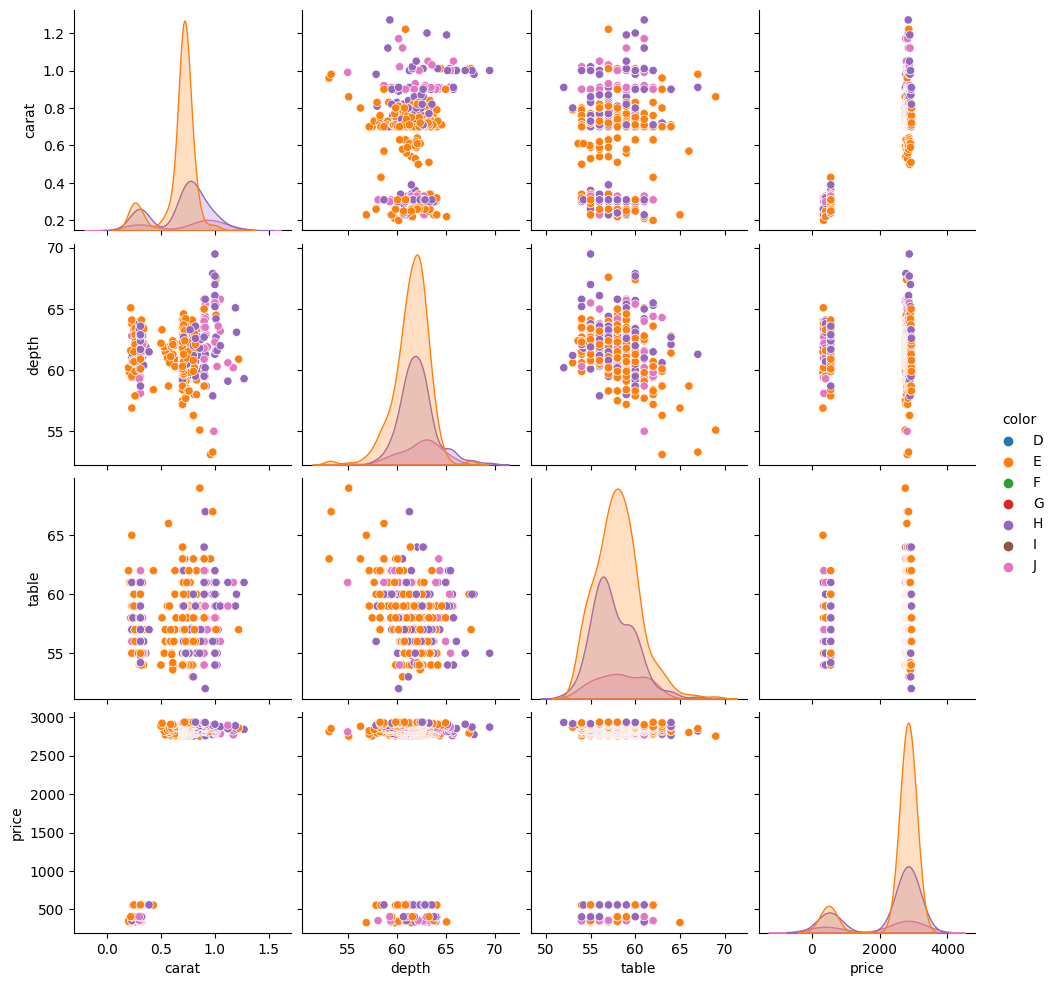

In [16]:
sns.pairplot(diamonds_filtered,hue='color')

### Comment:
Consider any pair of features? Do you think they are linearly separable? 


In [17]:
#comment here. which 2D projections seems easier to work on.
# As we can see from the pairplot, there is no data that is directly linearly seperable. Price vs anythig seems to be the most useful feature to work on.


### Prepare your data 

In [18]:
from sklearn import preprocessing

# choose a pair of features to form data X. Convert the diamonds color label to index label y. 
# Use sklearn.preprocessing.LabelEncoder to convert the color labels to numerical values.
data = diamonds_filtered.copy()

# Drop NANs
data = data.dropna()

# See how much data points you have 
print(data.shape)

# Prepare your data. Choose two feature columns. and get target labels as an integer or one-hot encoded value
# X, y =  # # TODO Get the features and the corresponding classes
le = preprocessing.LabelEncoder()
data['color'] = le.fit_transform(data['color'])

X = data[['carat', 'depth']].values
y = data['color'].values

(500, 5)


### f. Model and Training (15pts) 
Create a one hidden layer multilayer neural network model, train and test. 
* Obtain at least 70% test accuracy in 30 epochs, at most.
* Tune the variables as you wish. 
* For activations, optimizers you can choose any. But the following question asks you to compare cases. 

In [ ]:
# Complete the code below

model = bases.Model() # Create a model instance

# The dataset must have 2 features, so the input size of first layer is 2. We have 3 classes, so size of last hidden is 3. 
# Each neuron corresponds the likelihood of a class, named P(y=neuron_index|x), where y is class label 
# and x is features given.

# Setup the model
# model_layers = a list of layers 

model_layers = # TODO a list of layers 

model(model_layers) # Load layers to model object
predictions  = np.ones(y.shape[0]) # Number of instances in the diamonds data
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index =  int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    

# Options
preprocessing_on = False
shuffle_on_each_epoch = True
regularization_strength = # TODO
n_epochs = # TODO
train_test_split_ratio = .2
print_every = # TODO
test_every = # TODO
test_points = []
if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)

optimizer = # TODO

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)

    # COMPLETE THE CODE BELOW 
    softmax_out = # TODO


    predictions = # TODO
    loss = # TODO
    train_acc = # TODO
    train_accs.append(train_acc)
    train_losses.append(loss)
    
    if epoch % print_every == 0:
        print(f"TRAIN:\tEpoch: {epoch:3d}, Loss: {loss:.5f}, Accuracy: {train_acc:.5f}")
    
    # call backpropagation
    #
    #

    # Then complete the testing part.
    if epoch % test_every == 0 or epoch == n_epochs - 1:
        softmax_out = # TODO
        predictions = # TODO
        loss = # TODO
        test_acc = # TODO
        test_losses.append(loss)
        test_points.append(epoch)
        test_accs.extend([test_acc for i in range(test_every)])
        print(f"TEST:\tEpoch: {epoch:3d}, Loss: {loss:.5f}, Accuracy: {test_acc:.5f}")

### f. Plot the training and test loss curves for diagnostics below (10 pts):



In [ ]:

import matplotlib.pyplot as plt
# insert your code below

### g1. Compare the performances of at least three different activation functions.  (10 pts)
Comment on the result. 

In [2]:
# Write the code 

### g2. Compare the performances of different learning rates.  (10 pts)
Comment on the result. 

In [3]:
# Write the code 

### h. Plot the confusion Matrix (10 points)
Plot the confusion matrix and comment on the result (for your best result)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# insert your code below

### i. Plot the decision boundary (10 points)
Here, plot the decision boundary of your best result on the feature space. Revisit the feature pair scatter plot of your chosen feature pair. Highlight different classes using different classes and markers. 
Make sure you can identify training and testing datasets separately. Alternatively you can plot two different scatter plots. The classification boundaries are the points on feature (input) space where any two classes have equal (or near equal probability). Also highlight misclassified samples. 

In [ ]:
# Train neural network model and classifier
# (Assuming you have already trained the model and classifier)
# insert your code below

### k. Comment how does using different activation functions affect decision boundary? (5pts)

In [ ]:
# show some plots and comment on them. 

### l. Original diamonds dataset can also be classified according to different categories: cut and clarity. Which label is easier to classify for your model?  (15 pts)

Change the filtering to create different subsets with different labels, "here". Filter the subset to have three classes, 500 samples and 2 features per sample. Then, classify the samples. Comment on the results.

In [ ]:
# insert your codes and write your comments here.

## 3. Pytorch (15 pts)
#### Repeat the model construction and training/testing (.f) with Pytorch layers and activations and optimizers. 

In [ ]:
# Code here. 